<a href="https://colab.research.google.com/github/Polliferraz/on34-python-s07-banco-de-dados-I/blob/main/Polli_Bicho_vicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ON34 Python S07 Banco de dados I - Exercicio de aula

Esse documento tem como objetivo passar passo a passo de um exercício que deverá ser feito durante a aula de Bando de dados I.



## Bicho é meu Vicio

Você, como arquiteta de banco de dados, recebeu um novo cliente, o "Bicho é meu Vicio" que precisa urgentemente de uma arquitetura de seus dados.

O negócio da empresa é prestar os serviços de banho, corte e adestramento para todo o tipo de animal, mas especializado em aves, mamiferos, répiteis e peixes. Em seus resgistros, gostariam de guardar informações sobre os seus clientes humanoides e não humanóides e qual e quando aconteceu um atendimento deles na loja.

Com isso, esperam entender melhor seu fluxo de vendas, quais os serviços mais demandados e os tipos de bichos que mais os procuram.

## Desafio 1

Criar 3 ou mais entidades de tabelas, seus campos e atributos.


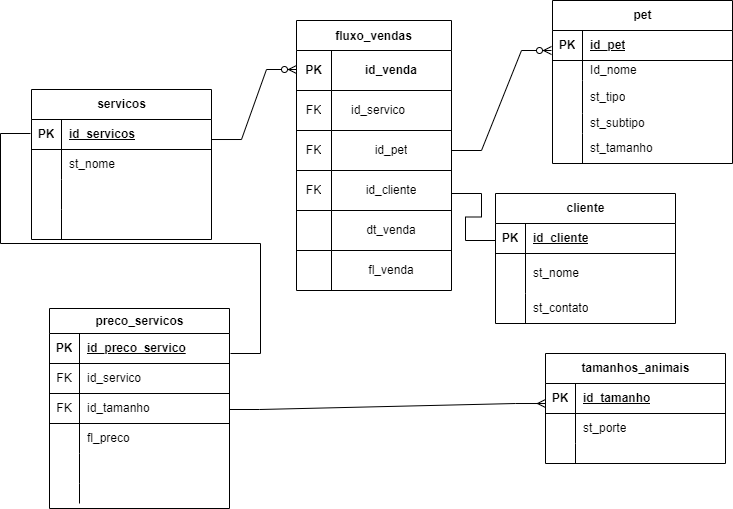

Resposta esperada: Um desenho de tabelas e suas relações, indicação de qual modelo de estrutura escolheu.

Para viabilizar a resolução dos próximos desafios preciso importar a biblioteca biblioteca SQLite, criar um banco de dados (de acordo com o diagrama previamente construído) e realizar conexão com este.

### Inicializando a biblioteca

Para se inicializar a biblioteca, deve-se:

In [1]:
# Importar a biblioteca
import sqlite3


#Criar uma conexão com um banco de dados (no nosso caso, não temos um arquivo de banco de dados pré feito, então decidiu-se inicializar um banco de dados
# denominado bichos_vicio.db).
conn = sqlite3.connect("bicho_meu_vicio.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

*   Criar as tabelas, observando tipos dos campos e dos suas naturezas.

### Criando tabelas isoladas (Sem chave estrangeira)


In [2]:
# Criando a tabela servicos
cur.execute("""
CREATE TABLE servicos(
  id_servico TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL
)
""")

### Desafio 2

Inserir valores em todas as tabelas

### Adicionando valores
Optei por adicionar os valores logo após a criação de cada tabela.

Resposta esperada: Consultas de todas as tabelas evidênciando os dados preenchidos.



In [3]:
# Inserindo dados na tabela servicos
cur.execute("""
INSERT INTO servicos (id_servico, st_nome) VALUES
('sbm', 'Banho'),
('scm', 'Corte'),
('sam', 'Adestramento'),
('sba', 'Banho'),
('sca', 'corte'),
('saa', 'Adestramento'),
('sbr', 'Banho'),
('sar', 'Adestramento'),
('sap', 'Adestramento')
""")

In [4]:
# Comitar as inserções
conn.commit()

Tabela pet

In [5]:
# Criando a tabela pet
cur.execute("""
CREATE TABLE pet(
  id_pet TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_tipo TEXT NOT NULL,
  st_subtipo TEXT NOT NULL,
  st_porte TEXT NOT NULL
)
""")

Inserindo valores da tabela pet

In [6]:
# Inserindo dados na tabela pet
cur.execute("""
INSERT INTO  pet (id_pet, st_nome, st_tipo, st_subtipo, st_porte) VALUES
("p1", 'Lulu','Aves', 'Papagaio', 'Pequeno'),
("p2", 'Caramelo','Mamíferos', 'Canídeo', 'Médio'),
("p3", 'Lili','Répteis', 'Iguana', 'Pequeno'),
("p4", 'Pipoca','Peixes', 'Peixe-Palhaço', 'Pequeno'),
("p5", 'Luter','Mamíferos', 'Felino', 'Pequeno'),
("p6", 'Van Gogh','Mamíferos', 'Felino', 'Pequeno')
""")

#aves, mamiferos, répteis e peixes

In [7]:
# Comitar as inserções
conn.commit()

Tabelas clientes

In [8]:
# Criando a tabela clientes
cur.execute("""
CREATE TABLE cliente(
  id_cliente TEXT NOT NULL PRIMARY KEY,
  st_nome TEXT NOT NULL,
  st_cotato TEXT NOT NULL
)
""")

Inserindo dados da tabela cliente

In [9]:
#inserindo dados da tebela cliente
cur.execute("""
INSERT INTO cliente
VALUES
("c1", 'José Azevedo', 'jazevedo@gmail.com.br'),
("c2", 'Maria Santana', 'msantana@gmail.com.br'),
("c3", 'Antônio Santos', 'asantos@gmail.com.br'),
("c4", 'José Luís', 'zeluiz@gmail.com.br'),
("c5", 'Ana Silva','asilva@gmail.com.br'),
("c6", 'Clever Leone','c.leone@gmail.com.br')
""")

In [10]:
# Comitar as inserções
conn.commit()

Tabela tamanho dos animais

In [11]:
# Criando a tabela tamanho dos animais
cur.execute("""
CREATE TABLE tamanho_animais(
  id_tamanho TEXT NOT NULL PRIMARY KEY,
  st_porte TEXT NOT NULL
)
""")

Inserindo dados do tamanho dos animais

In [12]:
#inserindo dados do tamanho dos animais
cur.execute("""
INSERT INTO tamanho_animais
VALUES
('t1', 'Pequeno'),
('t2', 'Médio'),
('t3', 'Grande')
""")

In [13]:
# Comitar as inserções
conn.commit()

Criando tabela fato (com chave estrangeira)

In [15]:
# Criando a tabela Fluxo de venda
cur.execute("""
CREATE TABLE fluxo_vendas(
  id_venda TEXT NOT NULL PRIMARY KEY,
  id_servico TEXT NOT NULL,
  Id_pet TEXT NOT NULL,
  id_cliente TEXT NOT NULL,
  dt_venda DATE NOT NULL,
  fl_venda REAL NOT NULL,
  FOREIGN KEY (id_servico) REFERENCES servicos(id_servico)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_pet) REFERENCES pet(id_pet)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_cliente) REFERENCES cliente(id_cliente)
         ON DELETE CASCADE
         ON UPDATE NO ACTION
)
""")

OperationalError: table fluxo_vendas already exists

In [16]:
 #Inserindo dados na tabela fluxo de vendas

cur.execute("""
INSERT INTO fluxo_vendas (id_venda, id_servico, id_pet, id_cliente, dt_venda, fl_venda) VALUES
(1, 'saa', 'p1', 'c1', '2024-07-01', 100.00),
(2, 'scm', 'p2', 'c2', '2024-07-01', 50.00),
(3, 'sam', 'p2', 'c2', '2024-07-01', 150.00),
(4, 'sar', 'p3', 'c3', '2024-07-01', 150.00),
(5, 'sap', 'p4', 'c4', '2024-07-01', 50.00),
(6, 'sbm', 'p6', 'c6', '2024-07-01', 50.00)

""")

In [17]:
# Comitar as inserções
conn.commit()

In [18]:
# Criando a tabela preço dos serviços
cur.execute("""
CREATE TABLE preco_servico(
  id_preco_servico TEXT NOT NULL PRIMARY KEY,
  id_servico TEXT NOT NULL,
  id_tamanho TEXT NOT NULL,
  fl_preco REAL NOT NULL,
  FOREIGN KEY (id_servico) REFERENCES servicos(id_servico)
         ON DELETE CASCADE
         ON UPDATE NO ACTION,
  FOREIGN KEY (id_tamanho) REFERENCES tamanho_animais(id_tamanho)
         ON DELETE CASCADE
         ON UPDATE NO ACTION
)
""")

In [19]:
# Inserir preço dos serviços
cur.execute("""
INSERT INTO preco_servico (id_preco_servico, id_servico, id_tamanho, fl_preco) VALUES
('vl1', 'sbm', 'Pequeno', 25.0),
('vl2', 'sbm', 'Médio', 50.0),
('vl3', 'sbm', 'Grande', 75.0),
('vl4', 'scm', 'Pequeno', 35.0),
('vl5', 'scm', 'Médio', 65.0),
('vl6', 'scm', 'Grande', 85.0),
('vl7', 'sam', 'Pequeno', 150.0),
('vl8', 'sam', 'Médio', 200.0),

('vl9', 'sam', 'Grande', 350.0),
('vl10', 'sba', 'Pequena', 50.0),
('vl11', 'sba', 'Média', 70.0),
('vl12', 'sba', 'Grande', 100.0),
('vl13', 'sca', 'Pequena', 15.0),
('vl14', 'sca', 'Média', 25.0),
('vl15', 'sca', 'Grande', 50.0),
('vl16', 'saa', 'Pequena', 100.0),

('vl17', 'saa', 'Média', 150.0),
('vl18', 'saa', 'Grande', 350.0),
('vl19', 'sbr', 'Pequeno', 35.0),
('vl20', 'sbr', 'Médio', 50.0),
('vl21', 'sar', 'Pequeno', 75.0),
('vl22', 'sar', 'Médio', 150.0),
('vl23', 'sap', 'Pequeno', 50.0),
('vl24', 'sap', 'Médio', 75.0)

""")

In [20]:
# Comitar as inserçoes
conn.commit()

In [21]:
# Fechando a conexão

conn.close()

##  Consultando valores

Nesse ponto, o objetivo principal é usar a [biblioteca SQLite](https://docs.python.org/3/library/sqlite3.html) e consultar registros para as tabelas criadas. Para tanto, deve-se:


*   Inicializar a biblioteca;
*   Criar consultas;
*   Atualizar os valores necessários.

[documentação](https://www.sqlitetutorial.net/)


In [22]:
# Importar a biblioteca
import sqlite3


#Criar uma conexão com um banco de dados existente
conn = sqlite3.connect("bicho_meu_vicio.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

### Trabalhar com consultas

Primeiro, deve-se entender cada elemento da consulta:

*   SELECT = O que deve ser selecionado e consultado (se preenche com nome de colunas e funções)
*   FROM = Base onde os dados estão armazenados (se preenche com nome de tabelas)
*   WHERE = Filtros que devem ser aplicados na consulta (se preenche com nome de colunas e suas condições)
*   GROUP BY = Agregações que devem ser aplicadas a consulta (se preenche com nome de colunas)
*   ORDER BY = Ordenações que devem ser aplicadas a consulta (se preenche com nome de colunas)
*   LIMIT = O tamanho máximo do resultado (se preenche com numeros inteiros)

In [23]:
#Consultar e listar todos os serviços
res = cur.execute("SELECT * FROM servicos") # asterisco indica que serão selecionados todos os serviços
res.fetchall()

[('sbm', 'Banho'),
 ('scm', 'Corte'),
 ('sam', 'Adestramento'),
 ('sba', 'Banho'),
 ('sca', 'corte'),
 ('saa', 'Adestramento'),
 ('sbr', 'Banho'),
 ('sar', 'Adestramento'),
 ('sap', 'Adestramento')]

In [24]:
#Consultar e listar todos os pets
res = cur.execute("SELECT * FROM pet")
res.fetchall()


[('p1', 'Lulu', 'Aves', 'Papagaio', 'Pequeno'),
 ('p2', 'Caramelo', 'Mamíferos', 'Canídeo', 'Médio'),
 ('p3', 'Lili', 'Répteis', 'Iguana', 'Pequeno'),
 ('p4', 'Pipoca', 'Peixes', 'Peixe-Palhaço', 'Pequeno'),
 ('p5', 'Luter', 'Mamíferos', 'Felino', 'Pequeno'),
 ('p6', 'Van Gogh', 'Mamíferos', 'Felino', 'Pequeno')]

In [25]:
# Fechando a conexão

conn.close()

### Desafio 3

Responder necessidade de negócio:


*   Qual o serviço mais usado da loja?
*   Qual o tipo de Bicho mais popular?
*   Qual a receita de vendas dos dados registrados?
*   Quais os ids mais importantes que preciso?


Resposta esperada: Respostas de acordo com o desenho e o preenchimento feito.


In [26]:
# Importar a biblioteca
import sqlite3


#Criar uma conexão com um banco de dados existente
conn = sqlite3.connect("bicho_meu_vicio.db")

# Criar um cursor no banco que permitirá o uso de comandos no formato SQL
cur  = conn.cursor()

*   Qual o serviço mais usado da loja?


In [28]:
# Qual o serviço mais usado da loja?
res = cur.execute("""
SELECT
  id_servico,
  count(id_servico)
FROM
  fluxo_vendas
GROUP BY
  id_servico
""")
res.fetchall()

[('saa', 1), ('sam', 1), ('sap', 1), ('sar', 1), ('sbm', 1), ('scm', 1)]

*   Qual o tipo de Bicho é mais popular?


In [29]:
#Qual o tipo de Bicho mais popular?
res = cur.execute("""
SELECT
  st_tipo,
  count(st_tipo)
FROM
  pet
GROUP BY
  st_tipo
""")
res.fetchall()

[('Aves', 1), ('Mamíferos', 3), ('Peixes', 1), ('Répteis', 1)]

*   Qual a receita de vendas dos dados registrados?


In [31]:
#Qual a receita de vendas dos dados registrados?
res = cur.execute("""
SELECT
  SUM(fl_venda)
FROM
  fluxo_vendas
""")
res.fetchall()

[(550.0,)]

*   Quais os ids mais importantes que preciso?


Todos os ids são importantes.